Importing the nessasary packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [2]:
COLUMNS=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
         'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
         'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
         'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
         'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
         'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [3]:
df=pd.read_csv('kddcup.data.corrected', names=COLUMNS)
df.drop_duplicates(inplace=True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


Preprocessing

In [4]:
df=pd.get_dummies(df, columns=['protocol_type'])
df['protocol_type_icmp']=df['protocol_type_icmp'].astype('int64')
df['protocol_type_tcp']=df['protocol_type_tcp'].astype('int64')
df['protocol_type_udp'] = df['protocol_type_udp'].astype('int64')

df['flag']=df['flag'].astype('category')
df['flag']=df['flag'].cat.codes
df['flag']=df['flag'].astype('int64')

df['service']=df['service'].astype('category')
df['service']=df['service'].cat.codes
df['service']=df['service'].astype('int64')

In [5]:
categorical = []
for col in df.columns:
    if len(df[col].unique()) < 5:
        categorical.append(col)

In [6]:
df_anomaly=df[df['label']!='normal.']
df=df[df['label']=='normal.']
df['label'] = 0
df_anomaly['label'] = 1

In [7]:
scaler = StandardScaler()
normal_label = df['label']
df.drop('label', axis=1, inplace=True)
anomaly_label = df_anomaly['label']
df_anomaly.drop('label', axis=1, inplace=True)
numerical_cols = [col for col in df.columns if col not in categorical]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_anomaly[numerical_cols] = scaler.transform(df_anomaly[numerical_cols])
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,-0.12536,-0.318677,0.221091,-0.012659,1.105658,0,0,-0.00246,-0.058054,-0.008216,...,-0.286687,-0.458774,-0.523117,-0.078004,-0.074266,-0.236866,-0.235887,0,1,0
1,-0.12536,-0.318677,0.221091,-0.013097,0.021105,0,0,-0.00246,-0.058054,-0.008216,...,-0.286687,3.742744,-0.523117,-0.078004,-0.074266,-0.236866,-0.235887,0,1,0
2,-0.12536,-0.318677,0.221091,-0.012485,-0.067161,0,0,-0.00246,-0.058054,-0.008216,...,-0.286687,1.641985,-0.523117,-0.078004,-0.074266,-0.236866,-0.235887,0,1,0
3,-0.12536,-0.318677,0.221091,-0.012510,-0.045656,0,0,-0.00246,-0.058054,-0.008216,...,-0.286687,0.927727,-0.523117,-0.078004,-0.074266,-0.236866,-0.235887,0,1,0
4,-0.12536,-0.318677,0.221091,-0.012460,-0.087007,0,0,-0.00246,-0.058054,-0.008216,...,-0.286687,0.591606,-0.523117,-0.078004,-0.074266,-0.236866,-0.235887,0,1,0


In [8]:
df['label'] = normal_label
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.2, random_state=42) 

Training the model. The model is already assigned with the parameters after performing the tuning.

In [11]:
X_train.drop('label', axis=1,inplace=True)
input_dim = X_train.shape[1]
encoding_dim = 128
input_layer = tf.keras.layers.Input(shape=(input_dim,))

encoder = tf.keras.layers.Dense(encoding_dim, activation='tanh')(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation='relu')(encoder)
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=100, shuffle=True)


Epoch 1/10
6503/6503 [==============================] - 15s 2ms/step - loss: 0.2797
Epoch 2/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.2281
Epoch 3/10
6503/6503 [==============================] - 12s 2ms/step - loss: 0.2169
Epoch 4/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.2101
Epoch 5/10
6503/6503 [==============================] - 12s 2ms/step - loss: 0.2068
Epoch 6/10
6503/6503 [==============================] - 12s 2ms/step - loss: 0.2037
Epoch 7/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.2019
Epoch 8/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.1988
Epoch 9/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.1984
Epoch 10/10
6503/6503 [==============================] - 11s 2ms/step - loss: 0.1959


The below code does the hyperparameter tuning.

In [ ]:
# X_train_hyper, X_test_hyper, y_train_hyper, y_test_hyper = train_test_split(df, df, test_size=0.7, random_state=42)
# def create_autoencoder(activation):
#     input_dim = X_train_hyper.shape[1]
#     hidden_units = hidden
#     input_layer = tf.keras.layers.Input(shape=(input_dim,))
#     encoder = tf.keras.layers.Dense(hidden_units, activation = 'tanh')(input_layer)
#     decoder = tf.keras.layers.Dense(input_dim, activation=activation)(encoder)
#     autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)
#     autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#     return autoencoder

# # Create the autoencoder model as a KerasRegressor
# autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)
# hidden = [32,64,84,128]
# # Define the hyperparameters to tune
# param_grid = {
#     'activation': ['relu', 'tanh','sigmoid']  
# }

# grid_search = GridSearchCV(estimator=autoencoder, param_grid=param_grid, cv=3)
# grid_result = grid_search.fit(X_train_hyper, X_train_hyper, epochs=10, batch_size=100)
# print("Best Hyperparameters: ", grid_result.best_params_)
# print("Best Score: ", grid_result.best_score_)

In [12]:
normal_label = X_test['label']
X_test.drop('label', axis=1, inplace=True)
joined_df = pd.concat([X_test,df_anomaly], axis=0)
joined_ytest = pd.concat([normal_label,anomaly_label], axis=0) 

In [13]:
reconstructed_data = autoencoder.predict(joined_df.values)
mse = np.mean(np.power(joined_df.values - reconstructed_data, 2), axis=1)
output = np.where(mse > 1.5, 1, 0).tolist()

13274/13274 [==============================] - 20s 1ms/step


Plotting the roc curve.

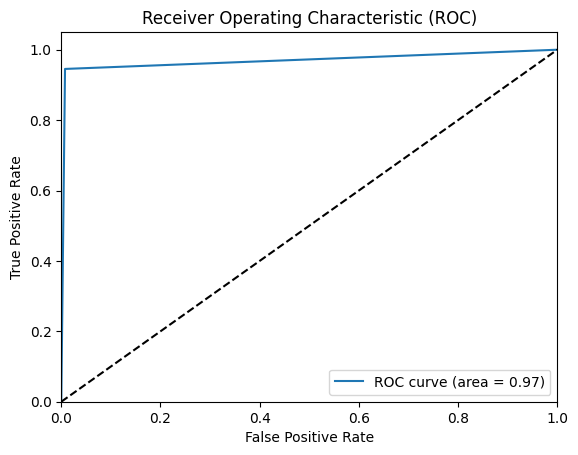

In [14]:
fpr, tpr, thresholds = roc_curve(joined_ytest, output)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
